In [1]:
import pandas as pd

/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [6]:
fitTraj = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/fitted_trajectories_optimized.csv",
                    index_col=0)

In [8]:
fitTraj = fitTraj.T

<Axes: >

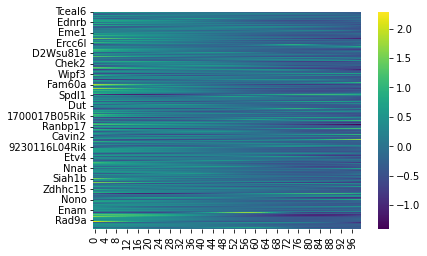

In [11]:
import seaborn as sns
sns.heatmap(fitTraj, cmap='viridis', cbar=True)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(fitTraj)
pivot_df = fitTraj
# Add cluster labels to the DataFrame
pivot_df['cluster'] = cluster_labels

# Step 4: Sort the DataFrame by clusters
clustered_df = pivot_df.sort_values('cluster')

# Remove the cluster column before plotting
plot_df = clustered_df.drop('cluster', axis=1)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
# Step 5: Hierarchical clustering for the columns (sample pairs)
# This helps to group similar sample pairs together for better visualization
#col_linkage = linkage(plot_df.T, method='ward')

# Step 6: Create a clustered heatmap
plt.figure(figsize=(16, 12))

# Use clustermap which combines hierarchical clustering with heatmap
g = sns.clustermap(
    plot_df,
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)



In [34]:
clustered_df[["cluster"]].to_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/gene_cluster.csv")

In [33]:
clustered_df[["cluster"]]

,cluster
Gk5,0
Plch1,0
Nrm,0
Lca5,0
Tmem54,0
...,...
Ruvbl1,7
Cmtm3,7
Zcwpw1,7
Hist1h4c,7


<Figure size 1152x864 with 0 Axes>

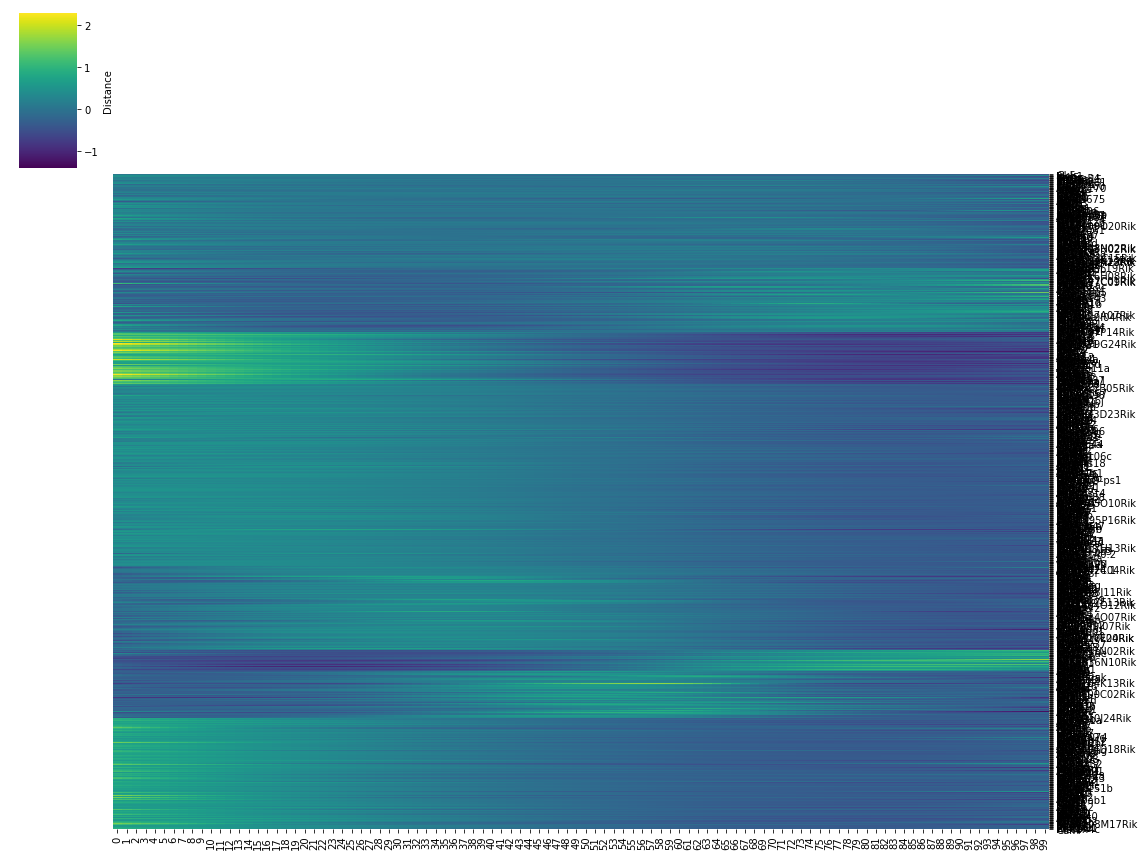